In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor as rfr

In [6]:
data = pd.read_csv("train.csv")
data.head()

id  track_popularity  danceability  energy  key  loudness  mode  \
0  16370                38         0.648   0.452    7    -8.653     1   
1  15819                35         0.532   0.718    8    -7.580     1   
2   7371                20         0.791   0.619    1    -5.886     1   
3  27615                36         0.619   0.639    7    -7.340     1   
4  17941                 0         0.790   0.844    1    -4.322     1   

   speechiness  acousticness  instrumentalness  ...  \
0       0.0476       0.68800          0.000009  ...   
1       0.0422       0.01400          0.000000  ...   
2       0.0532       0.00784          0.004230  ...   
3       0.0539       0.01880          0.000100  ...   
4       0.0356       0.10600          0.000000  ...   

   playlist_subgenre_new jack swing  playlist_subgenre_permanent wave  \
0                             False                             False   
1                             False                             False   
2                             False                             False   
3                             False                             False   
4                             False                             False   

   playlist_subgenre_pop edm  playlist_subgenre_post-teen pop  \
0                      False                            False   
1                      False                            False   
2                      False                            False   
3                      False                            False   
4                      False                            False   

   playlist_subgenre_progressive electro house  playlist_subgenre_reggaeton  \
0                                        False                        False   
1                                        False                        False   
2                                        False                        False   
3                                        False                        False   
4                                        False                        False   

   playlist_subgenre_southern hip hop  playlist_subgenre_trap  \
0                               False                   False   
1                               False                   False   
2                                True                   False   
3                               False                   False   
4                               False                   False   

   playlist_subgenre_tropical  playlist_subgenre_urban contemporary  
0                        True                                 False  
1                       False                                 False  
2                       False                                 False  
3                       False                                 False  
4                       False                                 False  

[5 rows x 45 columns]

In [8]:
df = data.drop(data.columns[15:45], axis=1)
df.head()

id  track_popularity  danceability  energy  key  loudness  mode  \
0  16370                38         0.648   0.452    7    -8.653     1   
1  15819                35         0.532   0.718    8    -7.580     1   
2   7371                20         0.791   0.619    1    -5.886     1   
3  27615                36         0.619   0.639    7    -7.340     1   
4  17941                 0         0.790   0.844    1    -4.322     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0476       0.68800          0.000009    0.3280    0.507   87.593   
1       0.0422       0.01400          0.000000    0.0781    0.439   99.962   
2       0.0532       0.00784          0.004230    0.3510    0.371  103.989   
3       0.0539       0.01880          0.000100    0.0863    0.200  128.009   
4       0.0356       0.10600          0.000000    0.1520    0.776  106.010   

   duration_ms  release_year  
0       289033        2018.0  
1       239375        2019.0  
2       173987        2016.0  
3       183765        2018.0  
4       233373        2015.0

In [9]:
df = df.drop(columns=["id"])
df.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                38         0.648   0.452    7    -8.653     1       0.0476   
1                35         0.532   0.718    8    -7.580     1       0.0422   
2                20         0.791   0.619    1    -5.886     1       0.0532   
3                36         0.619   0.639    7    -7.340     1       0.0539   
4                 0         0.790   0.844    1    -4.322     1       0.0356   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.68800          0.000009    0.3280    0.507   87.593       289033   
1       0.01400          0.000000    0.0781    0.439   99.962       239375   
2       0.00784          0.004230    0.3510    0.371  103.989       173987   
3       0.01880          0.000100    0.0863    0.200  128.009       183765   
4       0.10600          0.000000    0.1520    0.776  106.010       233373   

   release_year  
0        2018.0  
1        2019.0  
2        2016.0  
3        2018.0  
4        2015.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  21662 non-null  int64  
 1   danceability      21662 non-null  float64
 2   energy            21662 non-null  float64
 3   key               21662 non-null  int64  
 4   loudness          21662 non-null  float64
 5   mode              21662 non-null  int64  
 6   speechiness       21662 non-null  float64
 7   acousticness      21662 non-null  float64
 8   instrumentalness  21662 non-null  float64
 9   liveness          21662 non-null  float64
 10  valence           21662 non-null  float64
 11  tempo             21662 non-null  float64
 12  duration_ms       21662 non-null  int64  
 13  release_year      21662 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.3 MB


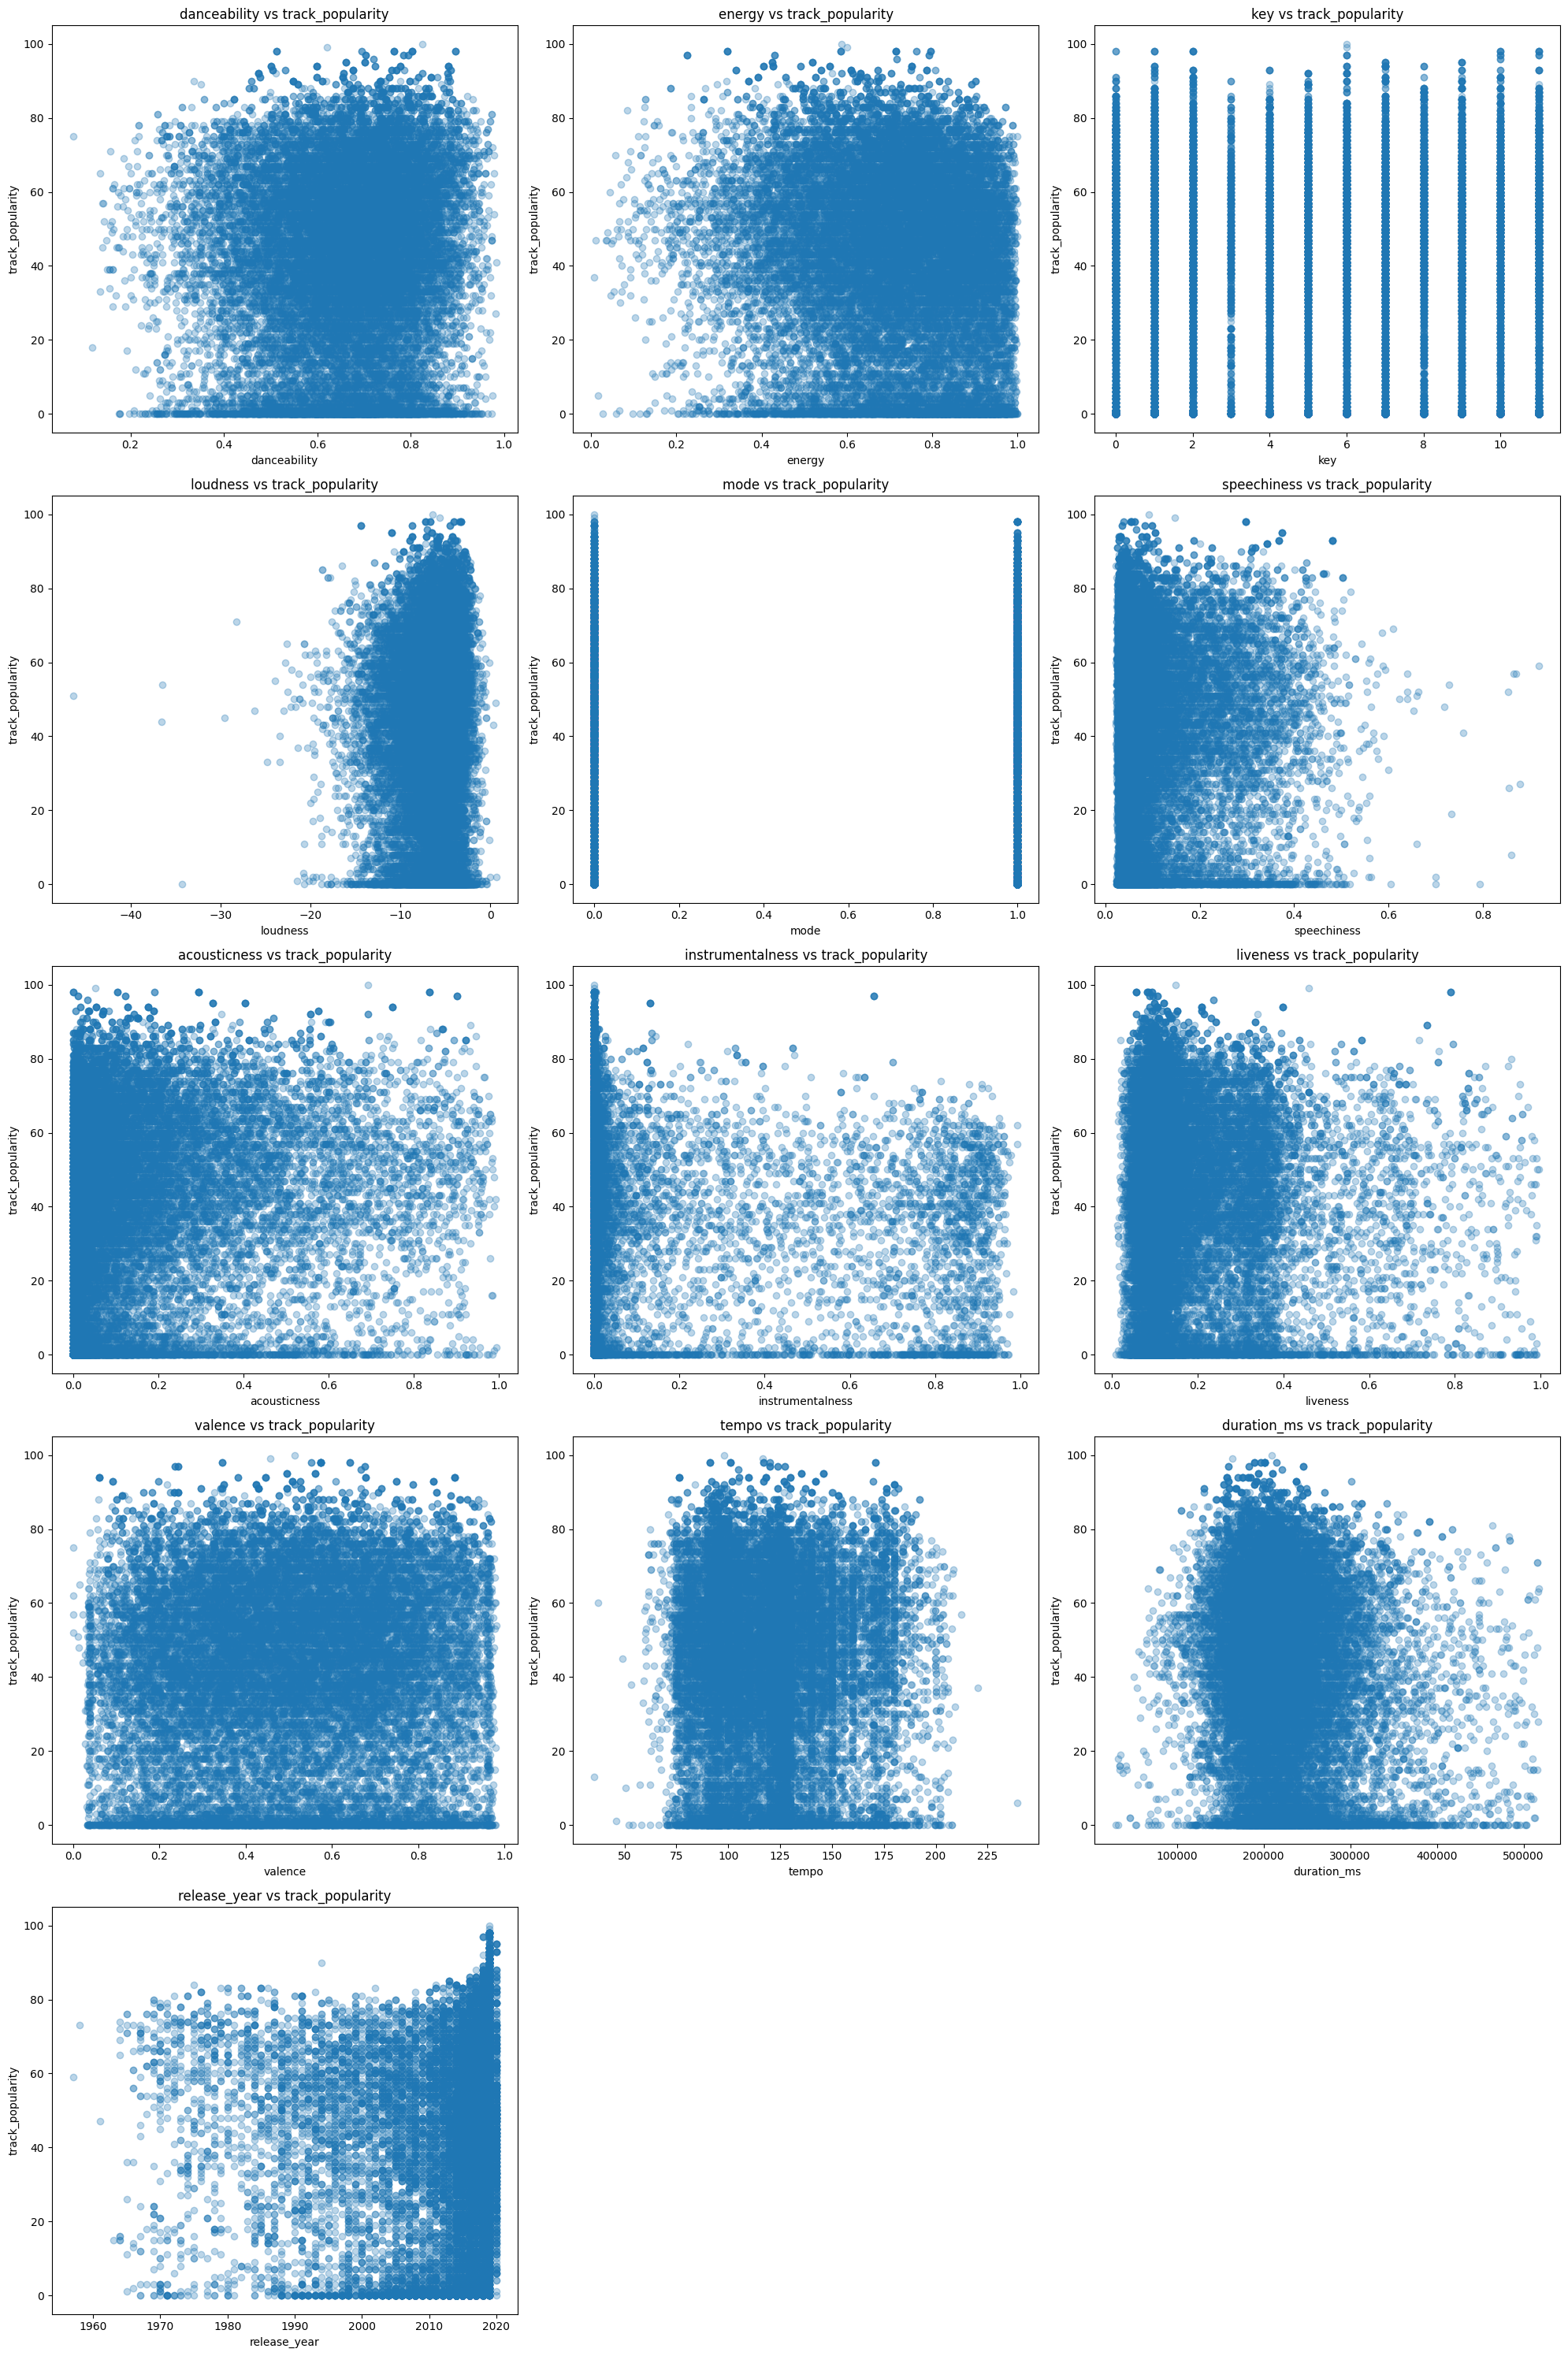

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'release_year']

plt.figure(figsize=(20, 30))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    plt.scatter(df[feature], df['track_popularity'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('track_popularity')
    plt.title(f'{feature} vs track_popularity')

plt.tight_layout()
plt.show()


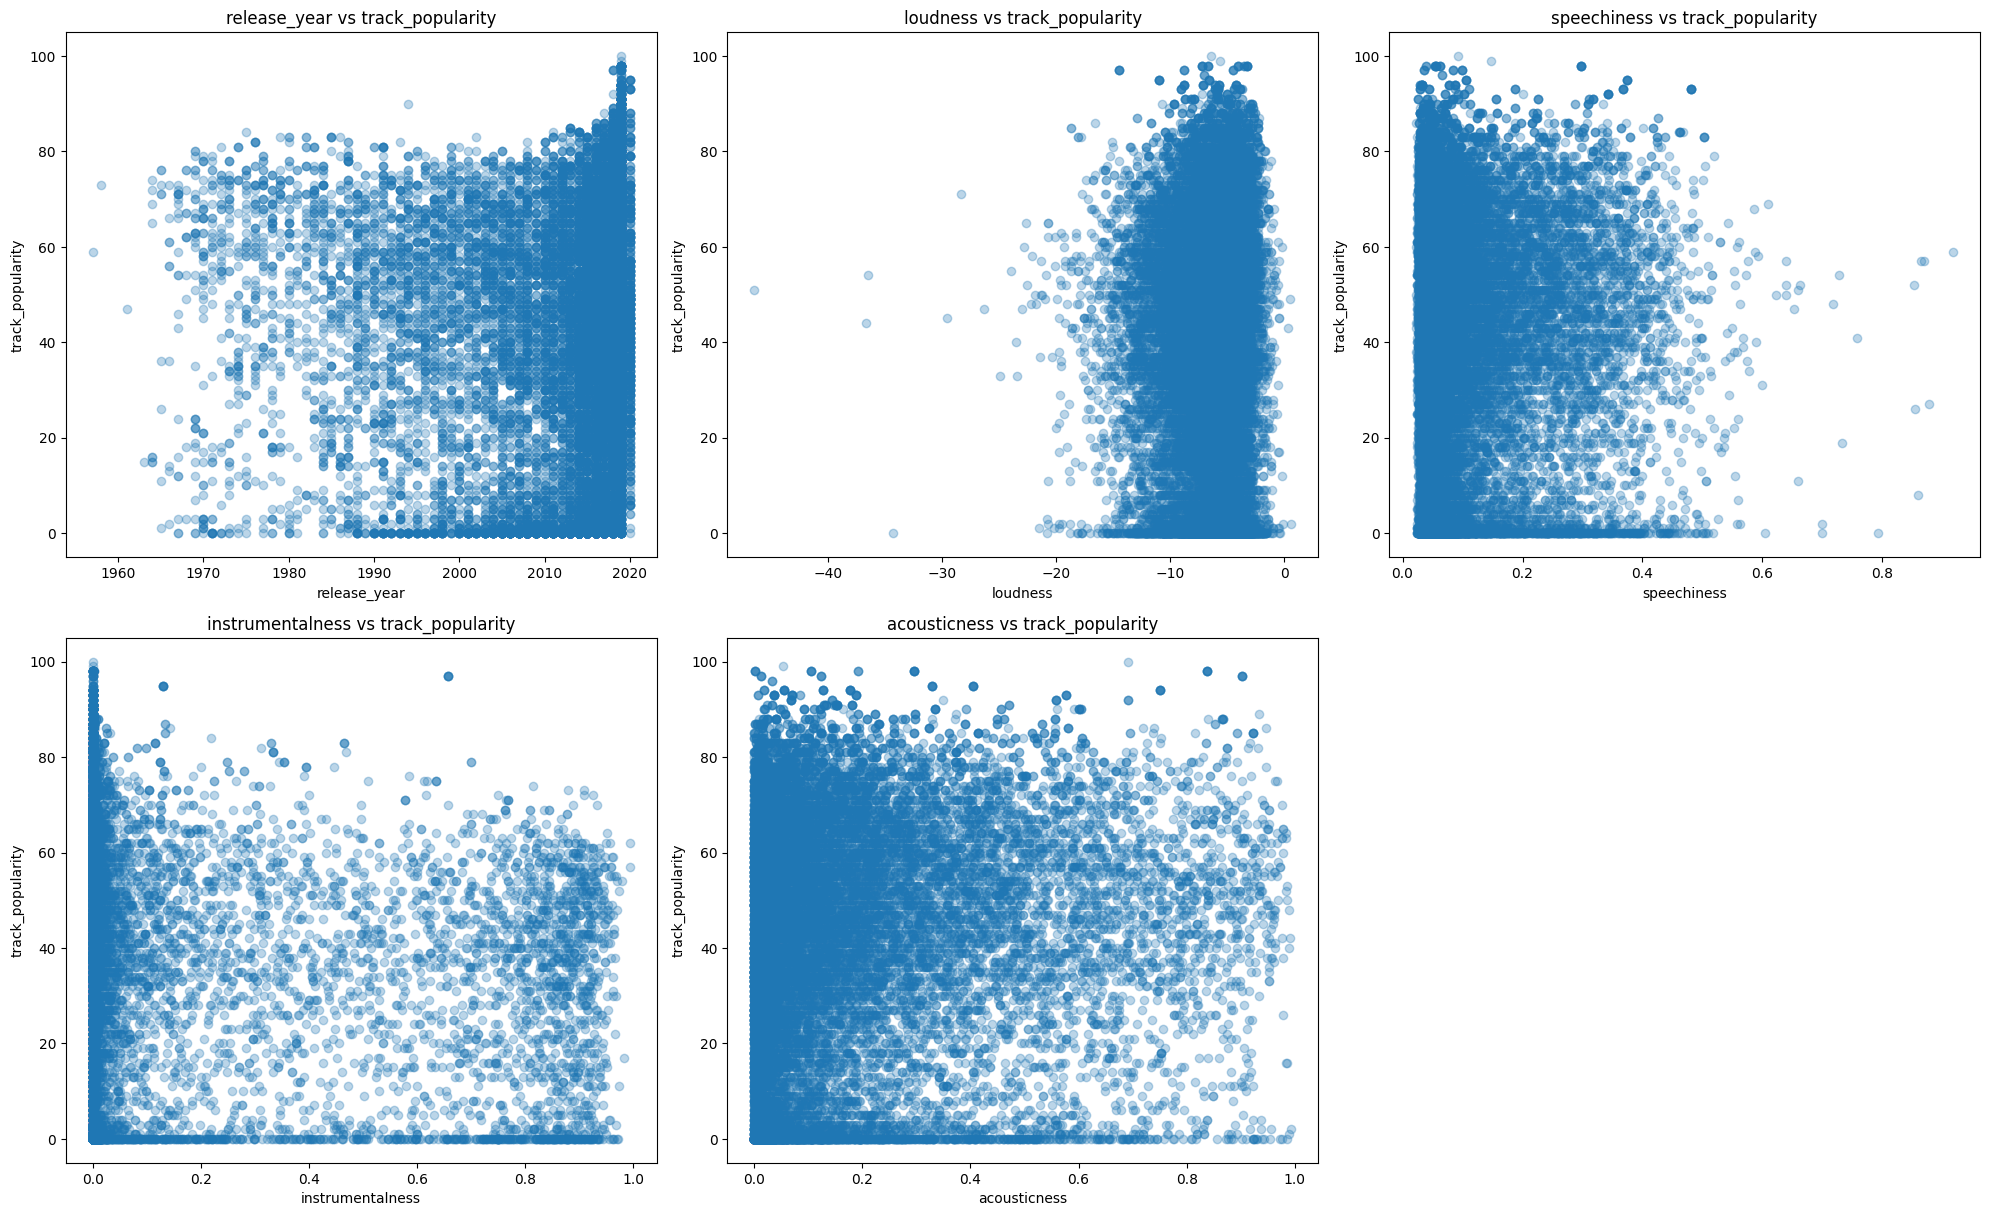

In [12]:
# selected_features = 

features = [
    'release_year', 
    'loudness', 
    'speechiness', 
    'instrumentalness', 
    'acousticness'
]

plt.figure(figsize=(20, 30))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    plt.scatter(df[feature], df['track_popularity'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('track_popularity')
    plt.title(f'{feature} vs track_popularity')

plt.tight_layout()
plt.show()



In [ ]:
selected_features = [
    'release_year',
    'loudness',
    'speechiness',
    'instrumentalness',
    'acousticness'
]
X = df[selected_features]
y = df['track_popularity']

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_year      21662 non-null  float64
 1   loudness          21662 non-null  float64
 2   speechiness       21662 non-null  float64
 3   instrumentalness  21662 non-null  float64
 4   acousticness      21662 non-null  float64
dtypes: float64(5)
memory usage: 846.3 KB


In [30]:
len(y)

21662

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Initialize and train model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Initialize and train the Random Forest model
rf_model = rfr(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Random Forest

In [49]:
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
print(f"Gradient Boosting RMSE: {rmse_rf:.2f}")

Gradient Boosting RMSE: 21.35


In [42]:
from sklearn.ensemble import GradientBoostingRegressor  as gbr

gb_model = gbr(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

### GradientBoostingRegressor

In [45]:
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5
print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")

Gradient Boosting RMSE: 22.94


### KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

rmse_knn = mean_squared_error(y_test, y_pred_knn) ** 0.5
print(f"KNN Regressor RMSE: {rmse_knn:.2f}")

KNN Regressor RMSE: 24.07


In [ ]:
y_pred = model_lr.predict(X_test)

### Linear Regression 

In [37]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: 0.04015634340173346
Root Mean Squared Error (RMSE): 24.393504272977257


### testing on test.csv

In [50]:
test_data = pd.read_csv("test.csv")
test_data = data.drop(data.columns[15:45], axis=1)
df = test_data.drop(columns=["id"])
df.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                38         0.648   0.452    7    -8.653     1       0.0476   
1                35         0.532   0.718    8    -7.580     1       0.0422   
2                20         0.791   0.619    1    -5.886     1       0.0532   
3                36         0.619   0.639    7    -7.340     1       0.0539   
4                 0         0.790   0.844    1    -4.322     1       0.0356   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.68800          0.000009    0.3280    0.507   87.593       289033   
1       0.01400          0.000000    0.0781    0.439   99.962       239375   
2       0.00784          0.004230    0.3510    0.371  103.989       173987   
3       0.01880          0.000100    0.0863    0.200  128.009       183765   
4       0.10600          0.000000    0.1520    0.776  106.010       233373   

   release_year  
0        2018.0  
1        2019.0  
2        2016.0  
3        2018.0  
4        2015.0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  21662 non-null  int64  
 1   danceability      21662 non-null  float64
 2   energy            21662 non-null  float64
 3   key               21662 non-null  int64  
 4   loudness          21662 non-null  float64
 5   mode              21662 non-null  int64  
 6   speechiness       21662 non-null  float64
 7   acousticness      21662 non-null  float64
 8   instrumentalness  21662 non-null  float64
 9   liveness          21662 non-null  float64
 10  valence           21662 non-null  float64
 11  tempo             21662 non-null  float64
 12  duration_ms       21662 non-null  int64  
 13  release_year      21662 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 2.3 MB


In [52]:
features = [
    'release_year', 
    'loudness', 
    'speechiness', 
    'instrumentalness', 
    'acousticness'
]
X = df[selected_features]
y = df['track_popularity']
# Predict on the new test set
y_pred_final = rf_model.predict(X)

# Evaluate
from sklearn.metrics import mean_squared_error

rmse_final = mean_squared_error(y, y_pred_final) ** 0.5
print(f"Final Test RMSE: {rmse_final:.2f}")

Final Test RMSE: 12.21
